# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 640


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    units = "metric"
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | kuche
City not found. Skipping...
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | camacha
Processing Record 5 of Set 1 | morro bay
Processing Record 6 of Set 1 | yayva
Processing Record 7 of Set 1 | bambous virieux
Processing Record 8 of Set 1 | lorengau
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | cam pha
City not found. Skipping...
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | hofn
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | kirov
Processing Record 16 of Set 1 | stornoway
Processing Record 17 of Set 1 | san patricio
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | ahipara
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | diks

Processing Record 37 of Set 4 | gwadar
Processing Record 38 of Set 4 | coahuayana
Processing Record 39 of Set 4 | cayenne
Processing Record 40 of Set 4 | hazorasp
Processing Record 41 of Set 4 | acarau
Processing Record 42 of Set 4 | hervey bay
Processing Record 43 of Set 4 | sioux lookout
Processing Record 44 of Set 4 | labuhan
Processing Record 45 of Set 4 | andenes
Processing Record 46 of Set 4 | walvis bay
Processing Record 47 of Set 4 | rawson
Processing Record 48 of Set 4 | provideniya
Processing Record 49 of Set 4 | tarko-sale
Processing Record 0 of Set 5 | samusu
City not found. Skipping...
Processing Record 1 of Set 5 | kumo
Processing Record 2 of Set 5 | sola
Processing Record 3 of Set 5 | ler
Processing Record 4 of Set 5 | keetmanshoop
Processing Record 5 of Set 5 | grand forks
Processing Record 6 of Set 5 | khandyga
Processing Record 7 of Set 5 | grande prairie
Processing Record 8 of Set 5 | east london
Processing Record 9 of Set 5 | yar-sale
Processing Record 10 of Set 5 |

Processing Record 25 of Set 8 | tidore
City not found. Skipping...
Processing Record 26 of Set 8 | qasigiannguit
Processing Record 27 of Set 8 | qingquan
Processing Record 28 of Set 8 | san quintin
Processing Record 29 of Set 8 | tiarei
Processing Record 30 of Set 8 | juba
Processing Record 31 of Set 8 | sovetskiy
Processing Record 32 of Set 8 | gazni
City not found. Skipping...
Processing Record 33 of Set 8 | riyadh
Processing Record 34 of Set 8 | kirakira
Processing Record 35 of Set 8 | staryy merchyk
Processing Record 36 of Set 8 | honningsvag
Processing Record 37 of Set 8 | lompoc
Processing Record 38 of Set 8 | tuatapere
Processing Record 39 of Set 8 | nizhnevartovsk
Processing Record 40 of Set 8 | bara
Processing Record 41 of Set 8 | fiume veneto
Processing Record 42 of Set 8 | krasnoarmeysk
Processing Record 43 of Set 8 | praxedis guerrero
Processing Record 44 of Set 8 | tyret pervaya
Processing Record 45 of Set 8 | ola
Processing Record 46 of Set 8 | wedi
Processing Record 47 o

Processing Record 9 of Set 12 | waitati
Processing Record 10 of Set 12 | meiganga
Processing Record 11 of Set 12 | kneza
City not found. Skipping...
Processing Record 12 of Set 12 | kegums
Processing Record 13 of Set 12 | williston
Processing Record 14 of Set 12 | pokrovsk
Processing Record 15 of Set 12 | ginda
Processing Record 16 of Set 12 | ascension
Processing Record 17 of Set 12 | cayhagan
Processing Record 18 of Set 12 | fare
Processing Record 19 of Set 12 | gao
Processing Record 20 of Set 12 | arua
Processing Record 21 of Set 12 | honiara
Processing Record 22 of Set 12 | warqla
City not found. Skipping...
Processing Record 23 of Set 12 | berat
Processing Record 24 of Set 12 | karakendzha
City not found. Skipping...
Processing Record 25 of Set 12 | zolotinka
City not found. Skipping...
Processing Record 26 of Set 12 | moose jaw
Processing Record 27 of Set 12 | ust-nera
Processing Record 28 of Set 12 | hammerfest
Processing Record 29 of Set 12 | tilichiki
Processing Record 30 of S

{'coord': {'lon': 46.5833, 'lat': -21.15},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 17.84,
  'feels_like': 18.06,
  'temp_min': 17.84,
  'temp_max': 17.84,
  'pressure': 1015,
  'humidity': 91,
  'sea_level': 1015,
  'grnd_level': 923},
 'visibility': 10000,
 'wind': {'speed': 2.2, 'deg': 99, 'gust': 2.8},
 'clouds': {'all': 87},
 'dt': 1675818423,
 'sys': {'country': 'MG', 'sunrise': 1675824008, 'sunset': 1675870535},
 'timezone': 10800,
 'id': 1064258,
 'name': 'Ikalamavony',
 'cod': 200}

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,barrow,71.2906,-156.7887,-17.99,78,100,3.60,US,1675820439
1,busselton,-33.6500,115.3333,24.42,50,0,2.56,AU,1675820766
2,camacha,33.0833,-16.3333,12.68,72,40,6.69,PT,1675821001
3,morro bay,35.3658,-120.8499,15.17,76,100,3.11,US,1675820810
4,yayva,59.3303,57.2641,-15.46,98,100,2.78,RU,1675821022


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,barrow,71.2906,-156.7887,-17.99,78,100,3.60,US,1675820439
1,busselton,-33.6500,115.3333,24.42,50,0,2.56,AU,1675820766
2,camacha,33.0833,-16.3333,12.68,72,40,6.69,PT,1675821001
3,morro bay,35.3658,-120.8499,15.17,76,100,3.11,US,1675820810
4,yayva,59.3303,57.2641,-15.46,98,100,2.78,RU,1675821022


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

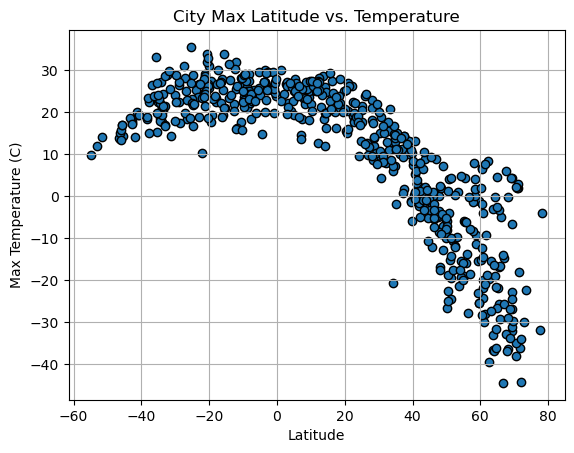

In [12]:
# Build scatter plot for latitude vs. temperature
x_value_lat = city_data_df["Lat"]
y_value_temp = city_data_df["Max Temp"]
plt.scatter(x_value_lat, y_value_temp, marker='o', edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

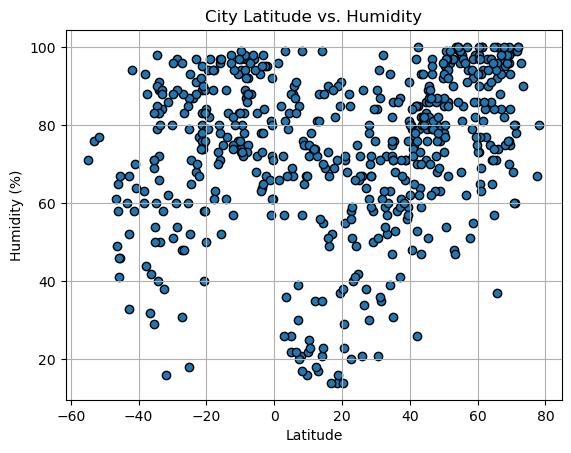

In [13]:
# Build the scatter plots for latitude vs. humidity
x_value_lat = city_data_df["Lat"]
y_value_hmd = city_data_df["Humidity"]
plt.scatter(x_value_lat, y_value_hmd, marker='o', edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

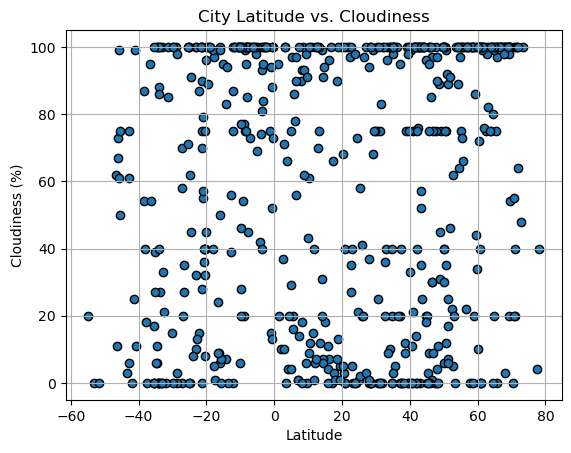

In [14]:
# Build the scatter plots for latitude vs. cloudiness
x_value_lat = city_data_df["Lat"]
y_value_cld = city_data_df["Cloudiness"]
plt.scatter(x_value_lat, y_value_cld, marker='o', edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

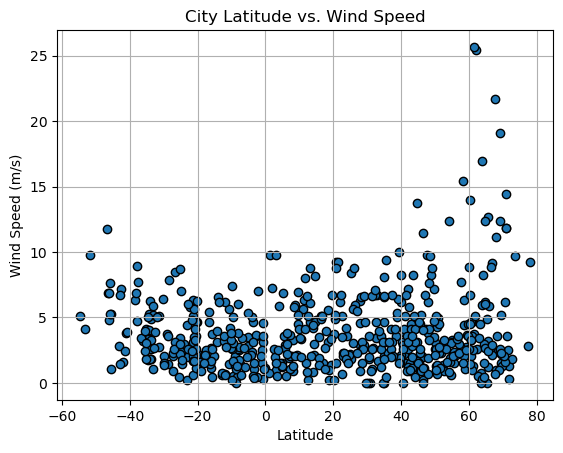

In [17]:
# Build the scatter plots for latitude vs. wind speed
x_value_lat = city_data_df["Lat"]
y_value_wsd = city_data_df["Wind Speed"]
plt.scatter(x_value_lat, y_value_wsd, marker='o', edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,barrow,71.2906,-156.7887,-17.99,78,100,3.60,US,1675820439
2,camacha,33.0833,-16.3333,12.68,72,40,6.69,PT,1675821001
3,morro bay,35.3658,-120.8499,15.17,76,100,3.11,US,1675820810
4,yayva,59.3303,57.2641,-15.46,98,100,2.78,RU,1675821022
9,hofn,64.2539,-15.2082,-0.19,71,100,8.21,IS,1675820938


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,busselton,-33.6500,115.3333,24.42,50,0,2.56,AU,1675820766
5,bambous virieux,-20.3428,57.7575,26.14,83,40,4.63,MU,1675820738
6,lorengau,-2.0226,147.2712,25.50,95,100,6.99,PG,1675821025
7,punta arenas,-53.1500,-70.9167,12.06,76,0,4.12,CL,1675821010
8,mataura,-46.1927,168.8643,13.60,65,73,4.79,NZ,1675821037


###  Temperature vs. Latitude Linear Regression Plot

Text(0, 0.5, 'Max Temperature (C)')

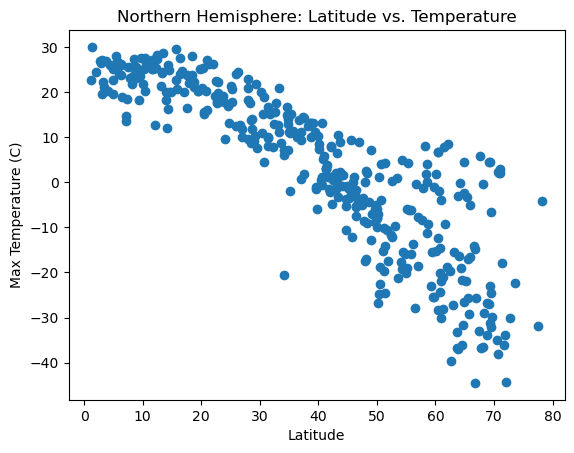

In [20]:
# Linear regression on Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Max Temp"]
plt.scatter(x_value, y_value, marker='o')

plt.title("Northern Hemisphere: Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")


Text(0, 0.5, 'Max Temperature (C)')

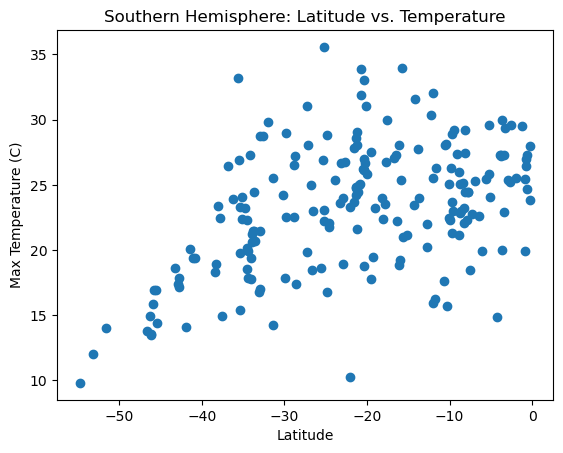

In [21]:
# Linear regression on Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Max Temp"]
plt.scatter(x_value, y_value, marker='o')

plt.title("Southern Hemisphere: Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

Text(0, 0.5, 'Humidity (%)')

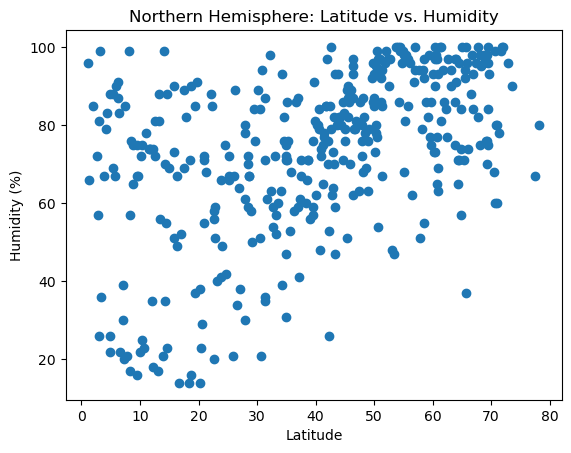

In [22]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Humidity"]
plt.scatter(x_value, y_value, marker='o')

plt.title("Northern Hemisphere: Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

Text(0, 0.5, 'Humidity (%)')

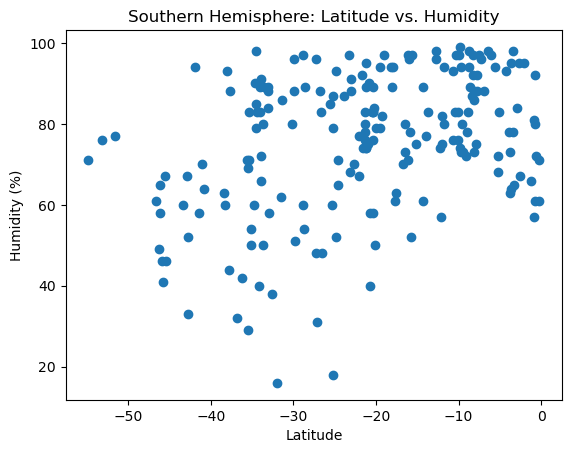

In [23]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Humidity"]
plt.scatter(x_value, y_value, marker='o')

plt.title("Southern Hemisphere: Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

Text(0, 0.5, 'Cloudiness (%)')

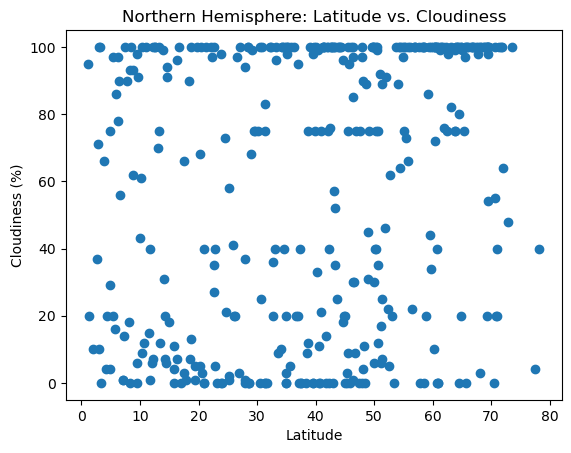

In [24]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Cloudiness"]
plt.scatter(x_value, y_value, marker='o')

plt.title("Northern Hemisphere: Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

Text(0, 0.5, 'Cloudiness (%)')

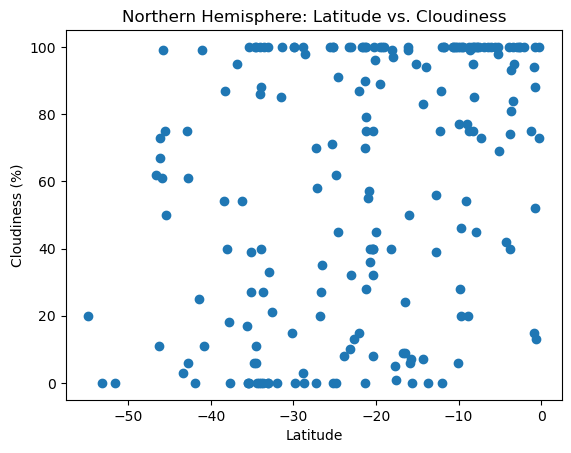

In [25]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Cloudiness"]
plt.scatter(x_value, y_value, marker='o')

plt.title("Southern Hemisphere: Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

Text(0, 0.5, 'Wind Speed (m/s)')

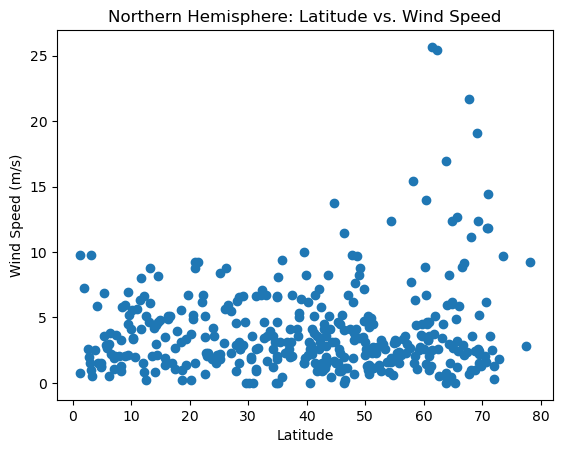

In [26]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Wind Speed"]
plt.scatter(x_value, y_value, marker='o')

plt.title("Northern Hemisphere: Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

Text(0, 0.5, 'Wind Speed (m/s)')

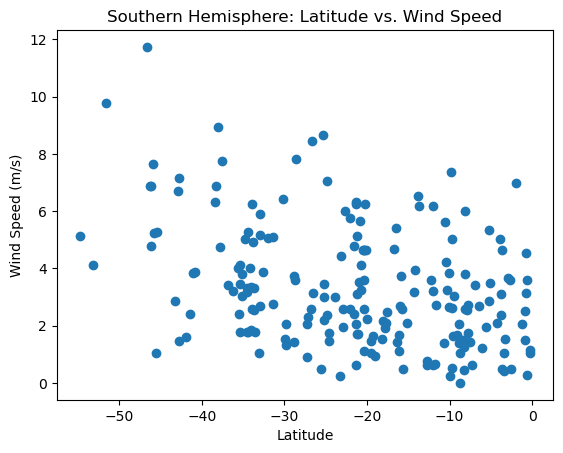

In [27]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Wind Speed"]
plt.scatter(x_value, y_value, marker='o')

plt.title("Southern Hemisphere: Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE